# Analysis - SF(San Francisco) Salaries
(https://www.kaggle.com/datasets/kaggle/sf-salaries?resource=download&select=Salaries.csv)

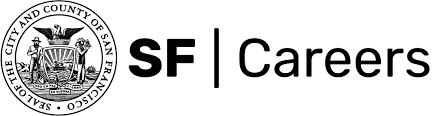

## QUESTIONS:

1- what is the highest base pay by job title, year, status and employee name?and What is the highest base pay across all columns?

2- what is the lowest base pay by job title, year, status and employee name?and What is the lowest base pay across all columns?

3- what is the highest total pay benefits by job title, year, status and employee name?and What is the highest total pay benefits across all columns?

4- what is the lowest total pay benefits by job title, year, status and employee name?and What is the lowest total pay benefits across all columns?

5- what is the average base pay through the years?

6- what is the average base pay, over time pay, other pay, total pay, total pay benefits through all years? 

7- what is the average base pay of BUSINESS ANALYST - PRINCIPAL?

8- what is the min base pay of BUSINESS ANALYST - PRINCIPAL?

9- what is the max base pay of BUSINESS ANALYST - PRINCIPAL?

10- What is the average Base Pay for each job title? 

In [1]:
import pandas as pd         # import pandas library
import matplotlib.pyplot as plt     
import seaborn as sns

In [2]:
sf_salaries= pd.read_csv("Salaries.csv(1)",low_memory=False)
sf_salaries

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0,0,0,0,0.00,0.00,2014,NaN,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN


In [3]:
# information about the data

sf_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [4]:
# convert basepay,OvertimePay,OtherPay columns to numeric data type and year data type to date data type

sf_salaries["BasePay"] = pd.to_numeric(sf_salaries["BasePay"], errors="coerce")

sf_salaries["OvertimePay"]= pd.to_numeric(sf_salaries["OvertimePay"], errors="coerce")

sf_salaries["OtherPay"]= pd.to_numeric(sf_salaries["OtherPay"], errors="coerce")

sf_salaries['Year'] = pd.to_datetime(sf_salaries['Year'], format='%Y',errors="coerce").dt.year

In [5]:
# checking data type of basepay column

sf_salaries["BasePay"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 148654 entries, 0 to 148653
Series name: BasePay
Non-Null Count   Dtype  
--------------   -----  
148045 non-null  float64
dtypes: float64(1)
memory usage: 1.1 MB


In [6]:
# checking all the nulls in the columns

sf_salaries["Notes"]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
148649   NaN
148650   NaN
148651   NaN
148652   NaN
148653   NaN
Name: Notes, Length: 148654, dtype: float64

## will remove the null values and drop the un needed columns

In [7]:
# delete the Notes column bec all the records null values

sf_salaries.drop("Notes", axis=1, inplace=True)

In [8]:
# checking 

sf_salaries.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,San Francisco,NaN


In [9]:
# replaced all the text values("not provided") in the column("BasePay") with 0.

sf_salaries["BasePay"].replace({"Not Provided":0}, inplace=True) 

# replaced nulls in the column("BasePay") with 0
    
sf_salaries["BasePay"].fillna(0,inplace=True)    




In [10]:
# checking 

sf_salaries[["BasePay"]]
# sf_salaries.iloc[:, [3]]     -----> this method display the same thing selecting all rows and third column

,BasePay
0,167411.18
1,155966.02
2,212739.13
3,77916.00
4,134401.60
...,...
148649,0.00
148650,0.00
148651,0.00
148652,0.00


In [11]:
# replaced nulls in the column("OvertimePay") with 0


sf_salaries["OvertimePay"].fillna(0, inplace=True)

# replaced text values in OvertimePay column with 0

sf_salaries["OvertimePay"].replace({"Not Provided":0}, inplace=True)

In [12]:
# checking

sf_salaries[["OvertimePay"]]

,OvertimePay
0,0.00
1,245131.88
2,106088.18
3,56120.71
4,9737.00
...,...
148649,0.00
148650,0.00
148651,0.00
148652,0.00


In [13]:
# replace text value in otherpay column with 0

sf_salaries["OtherPay"].replace({"Not Provided":0}, inplace=True)

# replace null with 0

sf_salaries["OtherPay"].fillna(0, inplace=True)

In [14]:
# checking

sf_salaries[["OtherPay"]]

,OtherPay
0,400184.25
1,137811.38
2,16452.60
3,198306.90
4,182234.59
...,...
148649,0.00
148650,0.00
148651,0.00
148652,0.00


In [15]:
# replace text value in Benefits column with 0

sf_salaries["Benefits"].replace({"Not Provided":0}, inplace=True)

# replace null with 0

sf_salaries["Benefits"].fillna(0, inplace=True)

In [16]:
# checking

sf_salaries[["Benefits"]]

,Benefits
0,0
1,0
2,0
3,0
4,0
...,...
148649,0
148650,0
148651,0
148652,0


In [17]:
# replaced nulls in the column("status") with text

sf_salaries["Status"].fillna("Not Mentioned",inplace=True)


In [18]:
# checking

sf_salaries.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0,567595.43,567595.43,2011,San Francisco,Not Mentioned
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0,538909.28,538909.28,2011,San Francisco,Not Mentioned
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0,335279.91,335279.91,2011,San Francisco,Not Mentioned
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0,332343.61,332343.61,2011,San Francisco,Not Mentioned
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0,326373.19,326373.19,2011,San Francisco,Not Mentioned


In [19]:
# checking the job title of the employee joseph driscoll

sf_salaries[sf_salaries["EmployeeName"]=="JOSEPH DRISCOLL"]["JobTitle"]

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

In [20]:
# i want to check the first 10 value in the whole column

#pd.set_option("display.max_rows", None) ----->  if i want to display an unlimited number of rows
sf_salaries["BasePay"].head(10)

0    167411.18
1    155966.02
2    212739.13
3     77916.00
4    134401.60
5    118602.00
6     92492.01
7    256576.96
8    176932.64
9    285262.00
Name: BasePay, dtype: float64

In [21]:
# highest basepay

sf_salaries["BasePay"].max()



319275.01

In [22]:
#  collecting all job titles, employees name, year and status in a variable

group=sf_salaries[["JobTitle","EmployeeName","Year","Status"]]
group.head()

,JobTitle,EmployeeName,Year,Status
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,NATHANIEL FORD,2011,Not Mentioned
1,CAPTAIN III (POLICE DEPARTMENT),GARY JIMENEZ,2011,Not Mentioned
2,CAPTAIN III (POLICE DEPARTMENT),ALBERT PARDINI,2011,Not Mentioned
3,WIRE ROPE CABLE MAINTENANCE MECHANIC,CHRISTOPHER CHONG,2011,Not Mentioned
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",PATRICK GARDNER,2011,Not Mentioned


In [23]:
# question (1) what is the highest base pay by job title, employee name, year and status?

group[sf_salaries["BasePay"]==sf_salaries["BasePay"].max()]

,JobTitle,EmployeeName,Year,Status
72925,Chief of Police,Gregory P Suhr,2013,Not Mentioned


In [24]:
# question (1) What is the highest base pay across all columns?

sf_salaries[sf_salaries["BasePay"]==sf_salaries["BasePay"].max()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
72925,72926,Gregory P Suhr,Chief of Police,319275.01,0.0,20007.06,86533.21,339282.07,425815.28,2013,San Francisco,Not Mentioned


In [25]:
# question (2)  what is the lowest base pay by job title, employee name, year and status?

group[sf_salaries["BasePay"]==sf_salaries["BasePay"].min()]

,JobTitle,EmployeeName,Year,Status
72832,Junior Clerk,Irwin Sidharta,2012,Not Mentioned


In [26]:
# question (2)  what is the lowest base pay across all columns?

sf_salaries[sf_salaries["BasePay"]==sf_salaries["BasePay"].min()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
72832,72833,Irwin Sidharta,Junior Clerk,-166.01,249.02,0.0,6.56,83.01,89.57,2012,San Francisco,Not Mentioned


In [27]:
# question(3) what is the highest total pay benefits by job title, year, status and employee name?

group[sf_salaries["TotalPayBenefits"]==sf_salaries["TotalPayBenefits"].max()]

,JobTitle,EmployeeName,Year,Status
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,NATHANIEL FORD,2011,Not Mentioned


In [28]:
# question (3) What is the highest total pay benefits across all columns?

sf_salaries[sf_salaries["TotalPayBenefits"]==sf_salaries["TotalPayBenefits"].max()]


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,0,567595.43,567595.43,2011,San Francisco,Not Mentioned


In [29]:
# question (4) what is the lowest total pay benefits by job title, year, status and employee name

group[sf_salaries["TotalPayBenefits"]==sf_salaries["TotalPayBenefits"].min()]

,JobTitle,EmployeeName,Year,Status
148653,"Counselor, Log Cabin Ranch",Joe Lopez,2014,PT


In [30]:
# question (4) what is the lowest total pay benefits across all columns

sf_salaries[sf_salaries["TotalPayBenefits"]==sf_salaries["TotalPayBenefits"].min()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0,-618.13,-618.13,2014,San Francisco,PT


In [31]:
# question (5) what is the average base pay through the years?

sf_salaries.groupby("Year")[["BasePay"]].mean()

,BasePay
Year,
2011,63595.956517
2012,65436.406857
2013,68509.832156
2014,66557.437750


In [32]:
# question (6) what is the average basepay, over time pay, other pay, totalpay, totalpaybenefits through all years?

yearly_avg_salaries=sf_salaries.groupby("Year").mean()
yearly_avg_salaries

,Id,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits
Year,,,,,,
2011,18080.0,63595.956517,4531.065429,3617.081926,71744.103871,71744.103871
2012,54542.5,65436.406857,5023.417824,3653.437583,74113.262265,100553.229232
2013,91728.5,68509.832156,5281.641980,3819.969007,77611.443142,101440.519714
2014,129593.0,66557.437750,5401.426941,3505.053449,75463.918140,100250.918884


In [33]:
# check how many values in each job title

sf_salaries["JobTitle"].value_counts().head()

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

In [34]:
# check the first 15 job titles

sf_salaries["JobTitle"].head(15)

0       GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
1                      CAPTAIN III (POLICE DEPARTMENT)
2                      CAPTAIN III (POLICE DEPARTMENT)
3                 WIRE ROPE CABLE MAINTENANCE MECHANIC
4         DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)
5                            ASSISTANT DEPUTY CHIEF II
6                   BATTALION CHIEF, (FIRE DEPARTMENT)
7                       DEPUTY DIRECTOR OF INVESTMENTS
8                   BATTALION CHIEF, (FIRE DEPARTMENT)
9               CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)
10    ASSISTANT CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)
11                     CAPTAIN III (POLICE DEPARTMENT)
12                         EXECUTIVE CONTRACT EMPLOYEE
13                                   DEPARTMENT HEAD V
14                  BATTALION CHIEF, (FIRE DEPARTMENT)
Name: JobTitle, dtype: object

In [35]:
# want to see the job titles that contains analyst

sf_salaries[sf_salaries['JobTitle'].str.contains('business analyst', case=False)]


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
3565,3566,SHAYNE JOHNSTON,IS BUSINESS ANALYST - PRINCIPAL,115817.00,0.00,19330.61,0,135147.61,135147.61,2011,San Francisco,Not Mentioned
3787,3788,RAYMOND DRISCOLL,IS BUSINESS ANALYST - PRINCIPAL,115817.05,0.00,17368.02,0,133185.07,133185.07,2011,San Francisco,Not Mentioned
4190,4191,NANCY LILLEGARD,IS BUSINESS ANALYST - SENIOR,100039.23,0.00,30065.02,0,130104.25,130104.25,2011,San Francisco,Not Mentioned
4737,4738,JEFFREY HILDEBRANT,IS BUSINESS ANALYST - PRINCIPAL,119127.20,6307.20,592.80,0,126027.20,126027.20,2011,San Francisco,Not Mentioned
5118,5119,BHARTI MUNI,IS BUSINESS ANALYST - PRINCIPAL,115816.96,7632.52,0.00,0,123449.48,123449.48,2011,San Francisco,Not Mentioned
...,...,...,...,...,...,...,...,...,...,...,...,...
141589,141590,Annie C Cheng,IS Business Analyst-Senior,5473.53,0.00,14393.39,1852.76,19866.92,21719.68,2014,San Francisco,PT
142771,142772,Jonathan A Sofer,IS Business Analyst-Principal,14789.88,0.00,0.00,147.92,14789.88,14937.80,2014,San Francisco,PT
143477,143478,Johns Cherian,IS Business Analyst,8540.50,0.00,0.00,3547.34,8540.50,12087.84,2014,San Francisco,PT
145141,145142,Ali A Flowers,IS Business Analyst-Senior,5007.00,0.00,0.00,1917.38,5007.00,6924.38,2014,San Francisco,PT


In [36]:
# collecting all the business analyst priciple job title in a variable

business_analyst_principal = sf_salaries[sf_salaries['JobTitle'] == 'IS BUSINESS ANALYST - PRINCIPAL']

In [37]:
# question(7) what is the average base pay of BUSINESS ANALYST - PRINCIPAL?

business_analyst_principal[["BasePay"]].mean()

BasePay    107063.545
dtype: float64

In [38]:
# question(8) what is the max base pay of BUSINESS ANALYST - PRINCIPAL?

business_analyst_principal[["BasePay"]].max()

BasePay    121817.28
dtype: float64

In [39]:
# question(9) what is the min base pay of BUSINESS ANALYST - PRINCIPAL?

business_analyst_principal[["BasePay"]].min()

BasePay    13386.02
dtype: float64

In [40]:
# question (10) What is the average Base Pay for each job title?

sf_salaries.groupby('JobTitle')[['BasePay']].mean()

,BasePay
JobTitle,
ACCOUNT CLERK,43300.806506
ACCOUNTANT,46643.172000
ACCOUNTANT INTERN,28732.663958
"ACPO,JuvP, Juv Prob (SFERS)",62290.780000
ACUPUNCTURIST,66374.400000
...,...
X-RAY LABORATORY AIDE,47664.773077
X-Ray Laboratory Aide,46086.387100
"YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS",52609.910000


In [41]:
sf_salaries.to_csv("SF Salaries.csv", index=False)